<a href="https://colab.research.google.com/github/vichhika/headline_prediction/blob/main/Headline_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ពិពណ៌នាពី Dataset គ្រូចែកឲ្យ

There are 422937 news pages. Each news headline has a corresponding category
Categories and the corresponding article counts are as follows:


*   152746 news of entertainment category
*   108465 news of science and technology category
*   115920 news of business category
*   45615 news of health category
*   2076 clusters of similar news for entertainment category
*   1789 clusters of similar news for science and technology category
*   2019 clusters of similar news for business category
*   1347 clusters of similar news for health category



# បញ្ចូល Library

In [15]:
!pip install texthero
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import texthero as hero
from texthero import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import tree
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# បញ្ចូល data 

In [16]:
%%bash
cd sample_data
FILE=headline_data.csv
if [ -f "$FILE" ]; then
    echo "$FILE exists."
else 
    curl https://anonfiles.com/vfSc7852x8 > download.html
    wget $(cat download.html | grep -Po "https://.*/headline_data.csv")
    rm download.html

fi

headline_data.csv exists.


In [17]:
df = pd.read_csv('./sample_data/headline_data.csv', sep='\t')
df.drop_duplicates(inplace=True)
#preview data
df.head(5)


,Unnamed: 0,TITLE,CATEGORY
0,0,"Fed official says weak data caused by weather,...",b
1,1,Fed's Charles Plosser sees high bar for change...,b
2,2,US open: Stocks fall after Fed official hints ...,b
3,3,"Fed risks falling 'behind the curve', Charles ...",b
4,4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b



# ចាប់ផ្តើម Pre-Processing

## កាត់ column អត់ប្រយោជន៏ចេញ

In [18]:
del df['Unnamed: 0']
#Preview data
df.head(5)

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [19]:
#preview data
df.tail(5)

,TITLE,CATEGORY
422932,Surgeons to remove 4-year-old's rib to rebuild...,m
422933,Boy to have surgery on esophagus after battery...,m
422934,Child who swallowed battery to have reconstruc...,m
422935,Phoenix boy undergoes surgery to repair throat...,m
422936,Phoenix boy undergoes surgery to repair throat...,m


## ឆែកមើលថាមានតំលៃ NULL អត់

In [20]:
df.isnull().values.any()

False

## សិក្សាពី Data

In [21]:
labels = sorted(list(set(df['CATEGORY'].astype('str'))))
print(f"[+] There are {labels} news categories\n") # ចែកប្រភេទ category របស់​ ចំណងជើង
for label in labels:
  numbers = len(df.loc[df['CATEGORY'] == label]) 
  print("[+] {0} news was categorized '{1}' type ({2:0.2f}%)".format(numbers,label,(numbers/(len(df.index)) * 100))) # count ចំនួនសរុបតាមផ្លែក category នីមួយៗ នឹង ភាគរយ
print(f'[+] Total news: {len(df)} articles')

[+] There are ['b', 'e', 'm', 't'] news categories

[+] 115967 news was categorized 'b' type (27.42%)
[+] 152828 news was categorized 'e' type (36.13%)
[+] 45639 news was categorized 'm' type (10.79%)
[+] 108503 news was categorized 't' type (25.65%)
[+] Total news: 422937 articles


### បំលែង Data ទៅជា​ លេខ​ និង clean text (digit, punctuation, brackets, diacritics, whitespace,និង stopwords)

In [22]:
#create a custom cleaning pipeline
df_x = hero.clean(df['TITLE']) #clean text (digit, punctuation, brackets, diacritics, whitespace,និង stopwords)
df_y = df['CATEGORY'] 
print(df_x[0])

fed official says weak data caused weather slow taper


#### បំលែង Title ទៅជា​ count និង​ Score


In [23]:
# feature_cv = CountVectorizer(stop_words='english')
# feature_cv.fit(df_x)


feature_tfidf = TfidfVectorizer()
df_x_tfidf = feature_tfidf.fit_transform(df_x)
print(df_x_tfidf.shape)
print(feature_tfidf.get_feature_names())
print(df_x_tfidf)

(422937, 51292)
['00am', '00msk', '00p', '00pm', '00z', '01am', '01pc', '025bn', '02am', '03am', '03bn', '04am', '04b', '04pm', '05am', '05b', '05bn', '06am', '06b', '06pm', '06z', '072b', '07am', '07b', '07pm', '07z', '08am', '08pc', '09am', '09b', '09pm', '09t12', '0b', '0bn', '0day', '0ff', '0ink', '0l', '0pc', '0s', '0t', '0ut', '0x8004804e', '100000s', '10000km', '10000m', '1000s', '100aires', '100b', '100bn', '100g', '100gb', '100gbps', '100k', '100m', '100mhz', '100mil', '100million', '100mn', '100s', '100th', '100yrs', '101b', '101m', '102nd', '103m', '104b', '104m', '105k', '105khrwn', '106b', '106bil', '106th', '107m', '1080p', '10am', '10b', '10bil', '10bln', '10bn', '10c', '10ft', '10gb', '10k', '10kg', '10km', '10m', '10million', '10mln', '10mnshy', '10mw', '10news', '10o', '10p', '10pc', '10s', '10th', '10x', '10x06', '10x07', '10x08', '10x09', '10x8', '10y', '1100km', '110m', '110th', '111m', '112m', '112th', '113k', '113m', '114m', '115m', '116b', '116m', '116mil', '117

#### បំលែង Label


In [24]:
le = LabelEncoder()
df_y = le.fit_transform(df_y)

In [25]:
print(df_y)
print(le.inverse_transform(df_y))


[0 0 0 ... 2 2 2]
['b' 'b' 'b' ... 'm' 'm' 'm']


# ចាប់ផ្តើមហៅអ្នក Accountant មកជួយចងសមីការឲ្យ

### រៀបចំ Data សំរាប់ Train ហើយនឹង Test

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df_x_tfidf, df_y, test_size=0.3, random_state=42)

In [27]:
for num,label in enumerate(labels):
  print("[+] Training label '{0}' : {1} ({2:0.2f}%)".format(label,len(y_train[y_train == num]),(len(y_train[y_train == num])/len(df.index)*100)))
  print("[+] Testing label '{0}'  : {1} ({2:0.2f}%)\n".format(label,len(y_test[y_test == num]),(len(y_test[y_test == num])/len(df.index)*100)))
print("-----------------------------------------------------------------------")
print("[+] Total Training : {0:0.2f}%".format(x_train.shape[0]/len(df.index) * 100))
print("[+] Total Testing  : {0:0.2f}%".format(x_test.shape[0]/len(df.index) * 100))


[+] Training label 'b' : 81192 (19.20%)
[+] Testing label 'b'  : 34775 (8.22%)

[+] Training label 'e' : 107122 (25.33%)
[+] Testing label 'e'  : 45706 (10.81%)

[+] Training label 'm' : 31891 (7.54%)
[+] Testing label 'm'  : 13748 (3.25%)

[+] Training label 't' : 75850 (17.93%)
[+] Testing label 't'  : 32653 (7.72%)

-----------------------------------------------------------------------
[+] Total Training : 70.00%
[+] Total Testing  : 30.00%


### ជួសជុល Data ដែលមិន Balanced គ្នា ឲ្យស្មើគ្នាទាំងអស់



In [28]:
rus = SMOTE()

x_rus, y_rus = rus.fit_resample(df_x_tfidf,df_y)
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.3, random_state=42)

In [29]:
for num,label in enumerate(labels):
  print("[+] Training label '{0}' : {1} ({2:0.2f}%)".format(label,len(y_train[y_train == num]),(len(y_train[y_train == num])/len(df.index)*100)))
  print("[+] Testing label '{0}'  : {1} ({2:0.2f}%)\n".format(label,len(y_test[y_test == num]),(len(y_test[y_test == num])/len(df.index)*100)))
print("-----------------------------------------------------------------------")
print("[+] Total Training : {0:0.2f}%".format(x_train.shape[0]/len(df.index) * 100))
print("[+] Total Testing  : {0:0.2f}%".format(x_test.shape[0]/len(df.index) * 100))

[+] Training label 'b' : 107029 (25.31%)
[+] Testing label 'b'  : 45799 (10.83%)

[+] Training label 'e' : 107043 (25.31%)
[+] Testing label 'e'  : 45785 (10.83%)

[+] Training label 'm' : 106853 (25.26%)
[+] Testing label 'm'  : 45975 (10.87%)

[+] Training label 't' : 106993 (25.30%)
[+] Testing label 't'  : 45835 (10.84%)

-----------------------------------------------------------------------
[+] Total Training : 101.18%
[+] Total Testing  : 43.36%


## ចាប់ផ្តើមចាក់ Algorithm ចូល Data

In [30]:
# style 1: text -> countVectorizer -> TFIDF
# cv1 = CountVectorizer(stop_words='english')
# x_traincv1 = cv1.fit_transform(x_train)
# tfidf_trans = TfidfTransformer()
# x_train_tfidf_trans = tfidf_trans.fit_transform(x_traincv1)

# style 2: text -> IFIDF (marge all step)
# tfidf = TfidfVectorizer(stop_words='english')
# x_train_tfidf = tfidf.fit_transform(x_train)
# x_train_tfidf.shape

In [31]:
def visualizeData(model,x_test,y_test,classes):
  fig = plt.figure(dpi=100)
  fig.add_subplot(221)
  model_predict = model.predict(x_test)
  cm = metrics.confusion_matrix(y_test,model_predict)
  cm_percentage = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
  plt.title('Confusion Matrix Report', fontsize = 12)
  sns.heatmap(cm_percentage, annot=True, xticklabels=classes, yticklabels=classes, fmt='.2f')
  fig.add_subplot(222)
  cr = ClassificationReport(model,classes=classes, support=True)
  cr.score(x_test,y_test)
  cr.show()
  print()
  print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,model_predict)))

In [32]:
def cross_validation(model,x,y,splits=10,title=None):
  cross_validation = KFold(splits)
  results = cross_val_score(model,x,y,cv=cross_validation)
  plt.bar(x=np.arange(len(results)),height=results)
  if title:
    plt.title(title)
  plt.xlabel("Split")
  plt.ylabel("Accuracy")
  plt.xticks(np.arange(len(results)))
  plt.yticks(np.arange(0,1.05,0.05))
  plt.show()


### Naive Bayes

In [33]:
multi_nb = MultinomialNB()
multi_nb.fit(x_train, y_train.astype('int'))

MultinomialNB()

#### Visualize trainning data

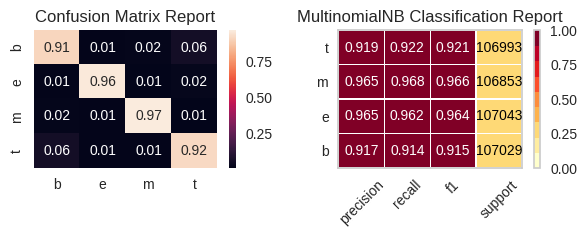


Accuracy: 0.9415


In [34]:
visualizeData(multi_nb,x_train,y_train,le.classes_)

#### Visualize testing data

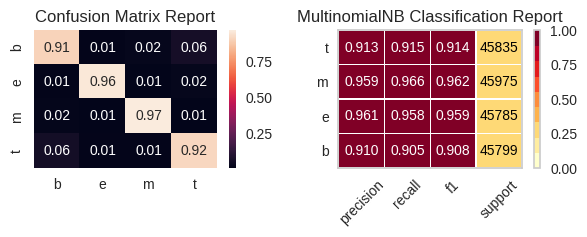


Accuracy: 0.9360


In [35]:
visualizeData(multi_nb,x_test,y_test,le.classes_)

#### Optimization hyperparameter


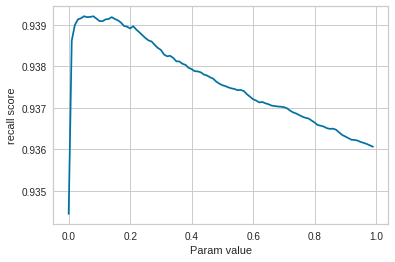

[+] High recall score: 0.9392073895547292
[+] Best apha value: 0.05


In [36]:
param_values,recall_scores = [],[]
high_recall = 0
best_param_value = 0
best_model_prediction = None
for x in np.arange(0,1,0.01):
  param_values.append(x)
  model = MultinomialNB(alpha=x)
  model.fit(x_train, y_train.astype('int'))
  model_predict = model.predict(x_test)
  recall_score = metrics.recall_score(y_test,model_predict,average='micro')
  recall_scores.append(recall_score)
  if recall_score > high_recall:
    high_recall = recall_score
    best_param_value = x
    best_model_prediction = model

plt.plot(param_values,recall_scores,"-")
plt.xlabel("Param value")
plt.ylabel("recall score")
plt.show()
print(f"[+] High recall score: {high_recall}")
print(f"[+] Best apha value: {best_param_value}")

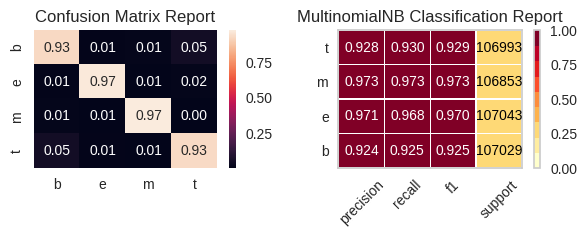


Accuracy: 0.9489


In [37]:
visualizeData(best_model_prediction,x_train,y_train,le.classes_)

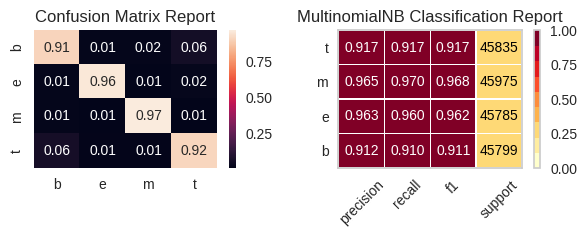


Accuracy: 0.9392


In [38]:
visualizeData(best_model_prediction,x_test,y_test,le.classes_)

#### Cross Validation


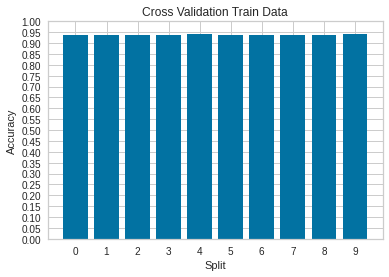

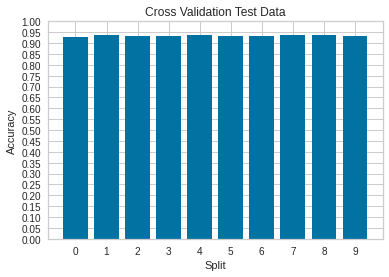

In [39]:
cross_validation(best_model_prediction,x_train,y_train,title="Cross Validation Train Data")
cross_validation(best_model_prediction,x_test,y_test,title="Cross Validation Test Data")

### Decision Tree

In [44]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(x_train, y_train.astype('int'))

DecisionTreeClassifier()

#### Visualize trainning data

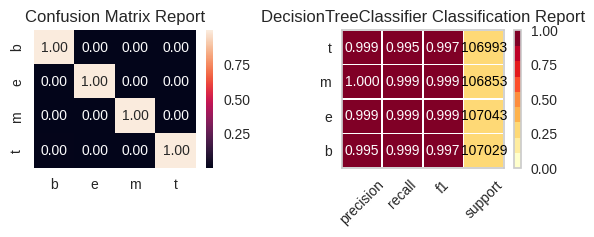


Accuracy: 0.9980


In [45]:
visualizeData(decision_tree,x_train,y_train,le.classes_)

#### Visualize testing data

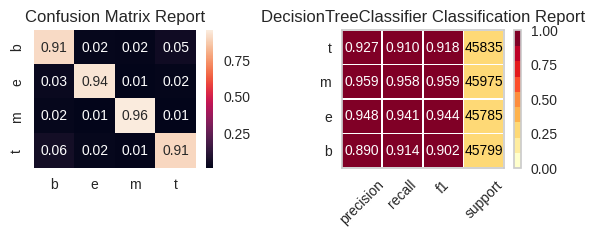


Accuracy: 0.9308


In [46]:
visualizeData(decision_tree,x_test,y_test,le.classes_)

### Artificial Neural Network

In [56]:
mlp_model = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30,20,10),solver='lbfgs', activation='identity')
mlp_model.fit(x_train, y_train.astype('int'))

MLPClassifier(activation='identity', alpha=1e-05,
              hidden_layer_sizes=(30, 20, 10), solver='lbfgs')

#### Visualize trainning data

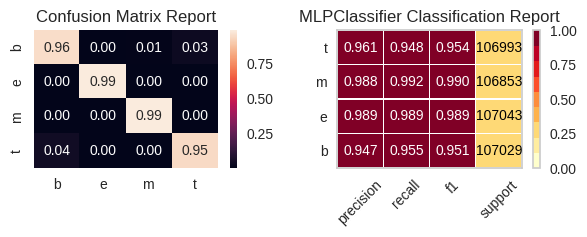


Accuracy: 0.9711


In [57]:
visualizeData(mlp_model,x_train,y_train,le.classes_)

#### Visualize testing data

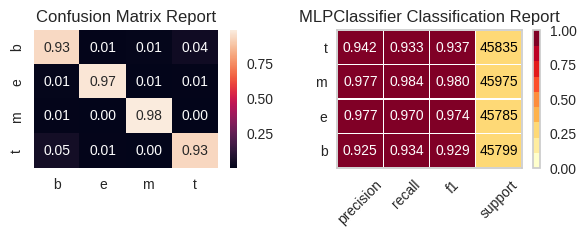


Accuracy: 0.9550


In [58]:
visualizeData(mlp_model,x_test,y_test,le.classes_)